In [1]:
import pathlib
import random

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Activation, Conv2D, Dense, Flatten,
                                     MaxPool2D)
from tensorflow.keras.losses import (BinaryCrossentropy,
                                     CategoricalCrossentropy,
                                     SparseCategoricalCrossentropy)
from tensorflow.keras.optimizers import Adam

In [3]:
#Preprocess data (get all of the pixel values between 0 and 1 
# it is also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.3,
                                       shear_range=0.3,
                                       zoom_range=0.3,
                                       width_shift_range = 0.3,
                                       height_shift_range=0.3,
                                       horizontal_flip=True)

In [4]:
# Set up paths to our directories

train_dir = "Intel image classification/Binary/train"
test_dir = "Intel image classification/Binary/test"

In [5]:
# Import data from directories and turn it into batches

imsize = (150, 150)
class_mode = "binary"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=imsize,
                                               class_mode=class_mode,
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size =32,
                                             target_size=imsize,
                                             class_mode = class_mode,
                                             seed=42)

train_data_aug = train_datagen_aug.flow_from_directory(directory=train_dir,
                                                       batch_size=32,
                                                       target_size = imsize,
                                                       class_mode=class_mode,
                                                       shuffle=True)


Found 4462 images belonging to 2 classes.
Found 911 images belonging to 2 classes.
Found 4462 images belonging to 2 classes.


In [6]:
def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    #Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape: {img.shape}") #show the shape of the image
    return img

['19666.jpg']
Image shape: (150, 150, 3)
['19607.jpg']
Image shape: (150, 150, 3)


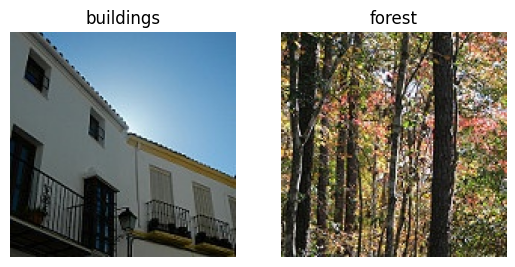

In [7]:

plt.figure()
plt.subplot(1, 2, 1)
bulding = view_random_image("Intel image classification/Binary/train/", "buildings")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("Intel image classification/Binary/train/", "forest")

In [8]:
def load_and_prep(filename, img_shape=150):
    """Reads an image from filename  and turns it into a tensor and reshapes it
    to (img_shape, img_shape, color_channels)."""

    # Read in the image 
    img= tf.io.read_file(filename=filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # resize image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    #Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [9]:
def plot_loss(history):
    """ Return seperate loss curves for training and validation metrics
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    # how many epochs ded we run
    
    # Plot loss
    
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # Plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

In [10]:
# Create the model and fit

tf.random.set_seed(42)

model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(150, 150,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(),
              metrics = ["accuracy"]
              )

history = model.fit(train_data, epochs =5,
                    steps_per_epoch= len(train_data),
                    validation_data = test_data,
                    validation_steps= len(test_data),
                    verbose=2)

Epoch 1/5
140/140 - 17s - loss: 0.3428 - accuracy: 0.8581 - val_loss: 0.2139 - val_accuracy: 0.9199 - 17s/epoch - 124ms/step
Epoch 2/5
140/140 - 5s - loss: 0.1748 - accuracy: 0.9386 - val_loss: 0.2291 - val_accuracy: 0.9122 - 5s/epoch - 39ms/step
Epoch 3/5
140/140 - 5s - loss: 0.1540 - accuracy: 0.9440 - val_loss: 0.1499 - val_accuracy: 0.9550 - 5s/epoch - 39ms/step
Epoch 4/5
140/140 - 5s - loss: 0.1302 - accuracy: 0.9550 - val_loss: 0.1911 - val_accuracy: 0.9254 - 5s/epoch - 37ms/step
Epoch 5/5
140/140 - 5s - loss: 0.1143 - accuracy: 0.9588 - val_loss: 0.1582 - val_accuracy: 0.9528 - 5s/epoch - 38ms/step


In [21]:
result = model.evaluate(train_data, verbose=2)

140/140 - 4s - loss: 0.1095 - accuracy: 0.9610 - 4s/epoch - 30ms/step


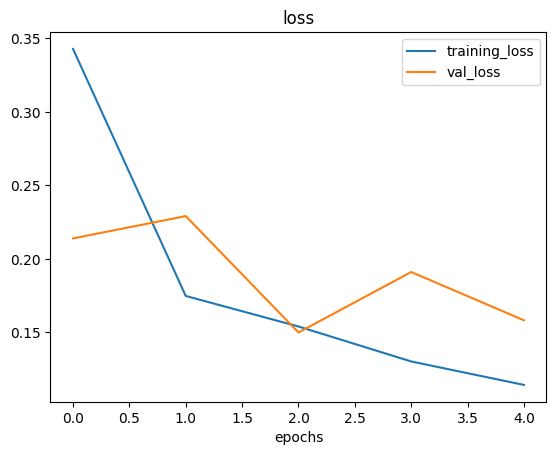

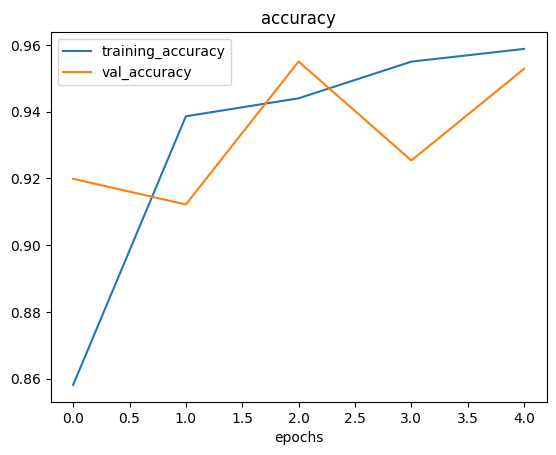

In [11]:
plot_loss(history)

In [12]:

tf.random.set_seed(42)

model2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(150, 150,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model2.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(),
              metrics = ["accuracy"]
              )



history2 = model2.fit(train_data, epochs =10,
                    steps_per_epoch= len(train_data),
                    validation_data = test_data,
                    validation_steps= len(test_data),
                    verbose=2)

Epoch 1/10
140/140 - 6s - loss: 0.3185 - accuracy: 0.8664 - val_loss: 0.2058 - val_accuracy: 0.9210 - 6s/epoch - 46ms/step
Epoch 2/10
140/140 - 6s - loss: 0.2110 - accuracy: 0.9137 - val_loss: 0.1979 - val_accuracy: 0.9188 - 6s/epoch - 43ms/step
Epoch 3/10
140/140 - 6s - loss: 0.1859 - accuracy: 0.9276 - val_loss: 0.2178 - val_accuracy: 0.9111 - 6s/epoch - 42ms/step
Epoch 4/10
140/140 - 6s - loss: 0.1433 - accuracy: 0.9478 - val_loss: 0.1416 - val_accuracy: 0.9440 - 6s/epoch - 42ms/step
Epoch 5/10
140/140 - 6s - loss: 0.1229 - accuracy: 0.9550 - val_loss: 0.1283 - val_accuracy: 0.9583 - 6s/epoch - 40ms/step
Epoch 6/10
140/140 - 5s - loss: 0.1118 - accuracy: 0.9606 - val_loss: 0.1250 - val_accuracy: 0.9528 - 5s/epoch - 39ms/step
Epoch 7/10
140/140 - 6s - loss: 0.0996 - accuracy: 0.9664 - val_loss: 0.1077 - val_accuracy: 0.9605 - 6s/epoch - 40ms/step
Epoch 8/10
140/140 - 5s - loss: 0.0846 - accuracy: 0.9733 - val_loss: 0.1187 - val_accuracy: 0.9583 - 5s/epoch - 37ms/step
Epoch 9/10
140/1

In [13]:
#Let's get the class names

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

print(class_names)

['buildings' 'forest']


In [15]:
def pred_and_plot_for_multi(model, filename, class_names):
    """Imports an image located at filename, makes a prediction with model
    and plots the image with predicted class as the title."""
    
    #Import the target image and preprocess it 
    img = load_and_prep(filename=filename)
    
    # Make predictions
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Add in logic for multiclass
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]
 
    
    # Plot the image and predicted class
    
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis("off")
    

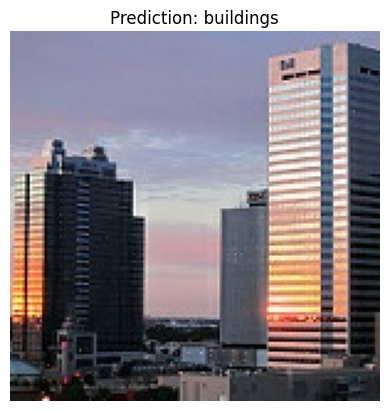

In [16]:
pred_and_plot_for_multi(model2, "5.jpg", ["buildings", "forest"])

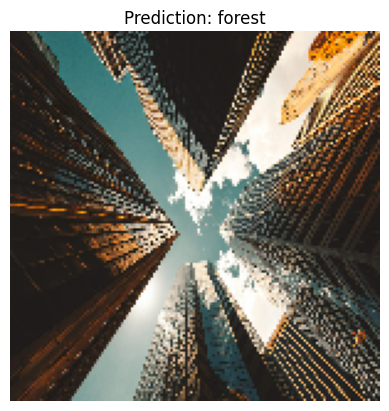

In [17]:
pred_and_plot_for_multi(model2, "gettybuild.jpg", ["buildings", "forest"])

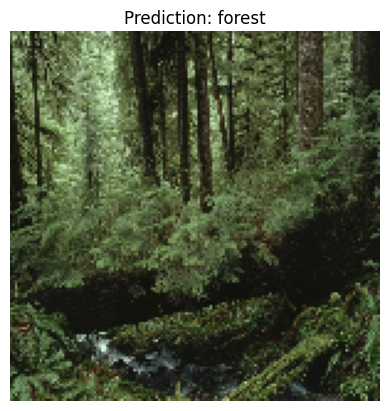

In [18]:
pred_and_plot_for_multi(model2, "forest1.jpg" ,["buildings", "forest"])

In [19]:
#Let's get the class names

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

print(class_names)

['buildings' 'forest']


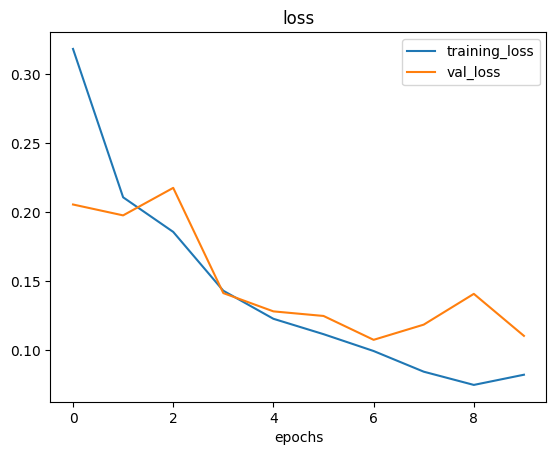

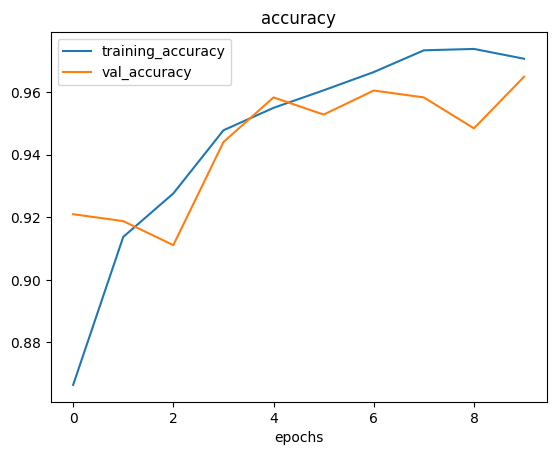

In [20]:
plot_loss(history2)